In [25]:
print('hello world')

hello world


In [26]:
import pandas as pd

# Specify encoding to handle special characters
df = pd.read_csv(r"C:\Users\Ah San\Downloads\archive\Student_Performance.csv", 
                 encoding='utf-8')
print(df.head(5))

   Hours Studied  Previous Scores Extracurricular Activities  Sleep Hours  \
0            NaN             99.0                        Yes          9.0   
1           19.0             82.0                         No          4.0   
2            8.0             51.0                        NaN          7.0   
3            5.0             52.0                        Yes          5.0   
4            7.0             75.0                         No          NaN   

   Sample Question Papers Practiced  Performance Index  
0                               1.0                 91  
1                               NaN                 65  
2                               2.0                 45  
3                             100.0                 36  
4                               5.0                 66  


In [27]:
print(df.tail(5))

      Hours Studied  Previous Scores Extracurricular Activities  Sleep Hours  \
9995            1.0             49.0                        Yes          4.0   
9996            7.0              NaN                        Yes          8.0   
9997            6.0             83.0                        NaN          8.0   
9998            NaN             97.0                        Yes          7.0   
9999           16.0             74.0                         No          8.0   

      Sample Question Papers Practiced  Performance Index  
9995                               2.0                 23  
9996                               5.0                 58  
9997                               NaN                 74  
9998                               0.0                 95  
9999                              87.0                 64  


In [28]:
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")

Rows: 10000, Columns: 6


In [29]:
print(df.dtypes)

Hours Studied                       float64
Previous Scores                     float64
Extracurricular Activities           object
Sleep Hours                         float64
Sample Question Papers Practiced    float64
Performance Index                     int64
dtype: object


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     9971 non-null   float64
 1   Previous Scores                   9972 non-null   float64
 2   Extracurricular Activities        9998 non-null   object 
 3   Sleep Hours                       9971 non-null   float64
 4   Sample Question Papers Practiced  9970 non-null   float64
 5   Performance Index                 10000 non-null  int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 468.9+ KB


#  Analyze Missing Data Pattern 

In [31]:
print(df.describe())
print("\nMissing values:")
print(df.isnull().sum())


       Hours Studied  Previous Scores  Sleep Hours  \
count    9971.000000      9972.000000  9971.000000   
mean        4.992478        69.442238     6.530037   
std         2.595816        17.345249     1.696292   
min         0.000000        40.000000     4.000000   
25%         3.000000        54.000000     5.000000   
50%         5.000000        69.000000     7.000000   
75%         7.000000        85.000000     8.000000   
max        19.000000        99.000000     9.000000   

       Sample Question Papers Practiced  Performance Index  
count                       9970.000000       10000.000000  
mean                           4.602608          55.224800  
std                            3.132855          19.212558  
min                            0.000000          10.000000  
25%                            2.000000          40.000000  
50%                            5.000000          55.000000  
75%                            7.000000          71.000000  
max                      

In [32]:
print("\nValue counts for Extracurricular Activities:")
print(df['Extracurricular Activities'].value_counts())


Value counts for Extracurricular Activities:
Extracurricular Activities
No        5045
Yes       4934
Asif         9
Ahsan        6
Ahsan        4
Name: count, dtype: int64


In [33]:
missing_values = df.isnull().sum()
columns_with_missing = missing_values[missing_values > 0]
print(columns_with_missing)

Hours Studied                       29
Previous Scores                     28
Extracurricular Activities           2
Sleep Hours                         29
Sample Question Papers Practiced    30
dtype: int64


In [34]:
# Calculate percentage of missing data
missing_percentage = (missing_values / len(df)) * 100
print(missing_percentage)

Hours Studied                       0.29
Previous Scores                     0.28
Extracurricular Activities          0.02
Sleep Hours                         0.29
Sample Question Papers Practiced    0.30
Performance Index                   0.00
dtype: float64


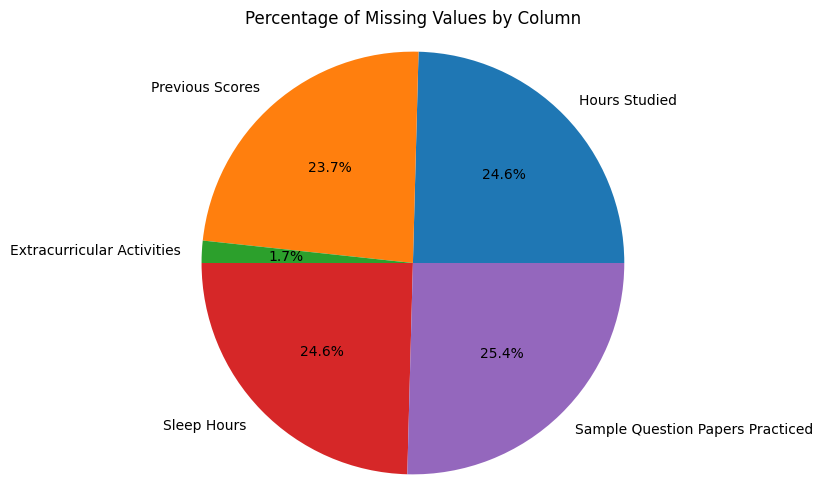

In [35]:
import matplotlib.pyplot as plt

# Use existing `missing_percentage` series and keep only columns with missing values
mp = missing_percentage[missing_percentage > 0]

fig, ax = plt.subplots(figsize=(6, 6))
ax.pie(mp, labels=mp.index, autopct='%1.1f%%', startangle=0, counterclock=True)
ax.set_title('Percentage of Missing Values by Column')
ax.axis('equal')  # keep pie circular
plt.show()

# Handling Missing Values

In [36]:
import pandas as pd

# Create a tabular view of missing values
missing_data = pd.DataFrame({
    'Column': missing_values.index,
    'Missing Count': missing_values.values,
    'Missing Percentage': missing_percentage.values
})

print(missing_data)

                             Column  Missing Count  Missing Percentage
0                     Hours Studied             29                0.29
1                   Previous Scores             28                0.28
2        Extracurricular Activities              2                0.02
3                       Sleep Hours             29                0.29
4  Sample Question Papers Practiced             30                0.30
5                 Performance Index              0                0.00


In [37]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [38]:
print("Mean values:")
print(df.mean(numeric_only=True))
print("\nMedian values:")
print(df.median(numeric_only=True))

Mean values:
Hours Studied                        4.992478
Previous Scores                     69.442238
Sleep Hours                          6.530037
Sample Question Papers Practiced     4.602608
Performance Index                   55.224800
dtype: float64

Median values:
Hours Studied                        5.0
Previous Scores                     69.0
Sleep Hours                          7.0
Sample Question Papers Practiced     5.0
Performance Index                   55.0
dtype: float64


In [39]:
from sklearn.impute import KNNImputer

# Separate numeric and non-numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
non_numeric_cols = df.select_dtypes(exclude=['float64', 'int64']).columns

# Apply KNN imputation to numeric columns
knn_imputer = KNNImputer(n_neighbors=5)
df[numeric_cols] = knn_imputer.fit_transform(df[numeric_cols])

# Verify missing values are filled
print("Missing values after KNN imputation:")
print(df.isnull().sum())

Missing values after KNN imputation:
Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          2
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64


In [40]:
print("Mean values:")
print(df.mean(numeric_only=True))
print("\nMedian values:")
print(df.median(numeric_only=True))

Mean values:
Hours Studied                        4.99424
Previous Scores                     69.44590
Sleep Hours                          6.53044
Sample Question Papers Practiced     4.60430
Performance Index                   55.22480
dtype: float64

Median values:
Hours Studied                        5.0
Previous Scores                     69.0
Sleep Hours                          7.0
Sample Question Papers Practiced     5.0
Performance Index                   55.0
dtype: float64


In [41]:
# Fill missing values with median for each numeric column
#df.fillna(df.median(numeric_only=True), inplace=True)

# Verify missing values are filled
#print("Missing values after filling:")
#print(df.isnull().sum())

In [42]:
print(df)

      Hours Studied  Previous Scores Extracurricular Activities  Sleep Hours  \
0               7.4             99.0                        Yes          9.0   
1              19.0             82.0                         No          4.0   
2               8.0             51.0                        NaN          7.0   
3               5.0             52.0                        Yes          5.0   
4               7.0             75.0                         No          6.2   
...             ...              ...                        ...          ...   
9995            1.0             49.0                        Yes          4.0   
9996            7.0             66.6                        Yes          8.0   
9997            6.0             83.0                        NaN          8.0   
9998            8.8             97.0                        Yes          7.0   
9999           16.0             74.0                         No          8.0   

      Sample Question Papers Practiced 

In [43]:
# Fill missing values in categorical column with mode (most frequent value)
df['Extracurricular Activities'].fillna(df['Extracurricular Activities'].mode()[0], inplace=True)

# Verify missing values are filled
print("Missing values after filling categorical data:")
print(df.isnull().sum())
print("\nExtracurricular Activities value counts:")
print(df['Extracurricular Activities'].value_counts())

Missing values after filling categorical data:
Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

Extracurricular Activities value counts:
Extracurricular Activities
No        5047
Yes       4934
Asif         9
Ahsan        6
Ahsan        4
Name: count, dtype: int64


C:\Users\Ah San\AppData\Local\Temp\ipykernel_17808\3127318813.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Extracurricular Activities'].fillna(df['Extracurricular Activities'].mode()[0], inplace=True)


In [44]:
print(df)

      Hours Studied  Previous Scores Extracurricular Activities  Sleep Hours  \
0               7.4             99.0                        Yes          9.0   
1              19.0             82.0                         No          4.0   
2               8.0             51.0                         No          7.0   
3               5.0             52.0                        Yes          5.0   
4               7.0             75.0                         No          6.2   
...             ...              ...                        ...          ...   
9995            1.0             49.0                        Yes          4.0   
9996            7.0             66.6                        Yes          8.0   
9997            6.0             83.0                         No          8.0   
9998            8.8             97.0                        Yes          7.0   
9999           16.0             74.0                         No          8.0   

      Sample Question Papers Practiced 

# Data Visualization

C:\Users\Ah San\AppData\Local\Temp\ipykernel_17808\449980681.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Extracurricular Activities', ax=axes[0, 1], palette='Set2')


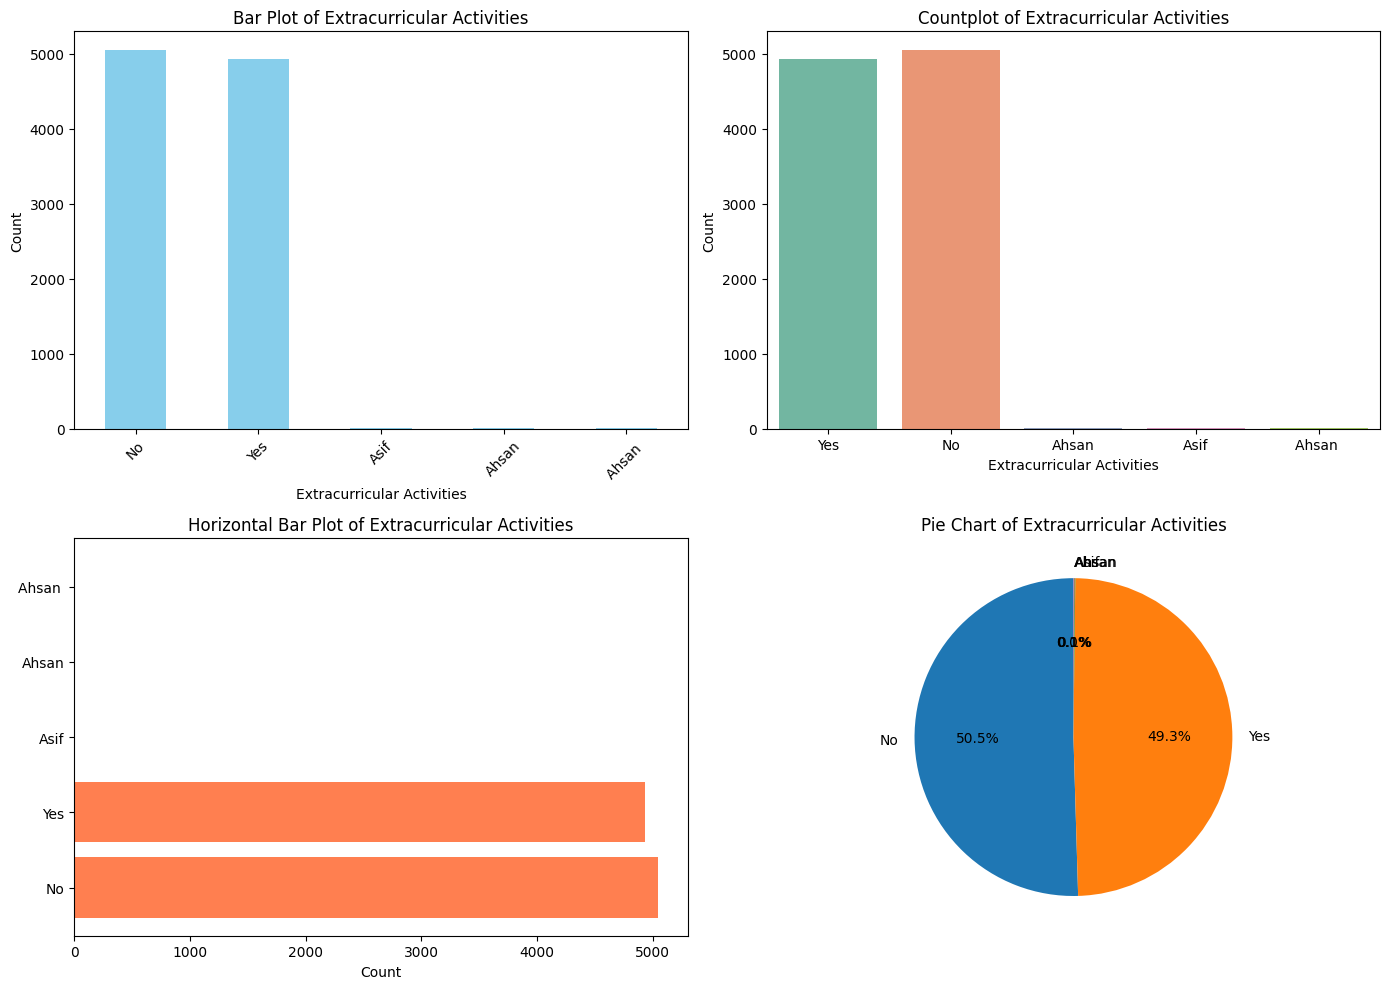

In [45]:
import seaborn as sns

import matplotlib.pyplot as plt

# Create a figure with 4 subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Bar plot
df['Extracurricular Activities'].value_counts().plot(kind='bar', ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Bar Plot of Extracurricular Activities')
axes[0, 0].set_xlabel('Extracurricular Activities')
axes[0, 0].set_ylabel('Count')
axes[0, 0].tick_params(axis='x', rotation=45)

# 2. Countplot
sns.countplot(data=df, x='Extracurricular Activities', ax=axes[0, 1], palette='Set2')
axes[0, 1].set_title('Countplot of Extracurricular Activities')
axes[0, 1].set_xlabel('Extracurricular Activities')
axes[0, 1].set_ylabel('Count')

# 3. Stacked bar plot (showing proportion)
activity_counts = df['Extracurricular Activities'].value_counts()
axes[1, 0].barh(activity_counts.index, activity_counts.values, color='coral')
axes[1, 0].set_title('Horizontal Bar Plot of Extracurricular Activities')
axes[1, 0].set_xlabel('Count')

# 4. Pie chart
activity_counts.plot(kind='pie', ax=axes[1, 1], autopct='%1.1f%%', startangle=90)
axes[1, 1].set_title('Pie Chart of Extracurricular Activities')
axes[1, 1].set_ylabel('')

plt.tight_layout()
plt.show()

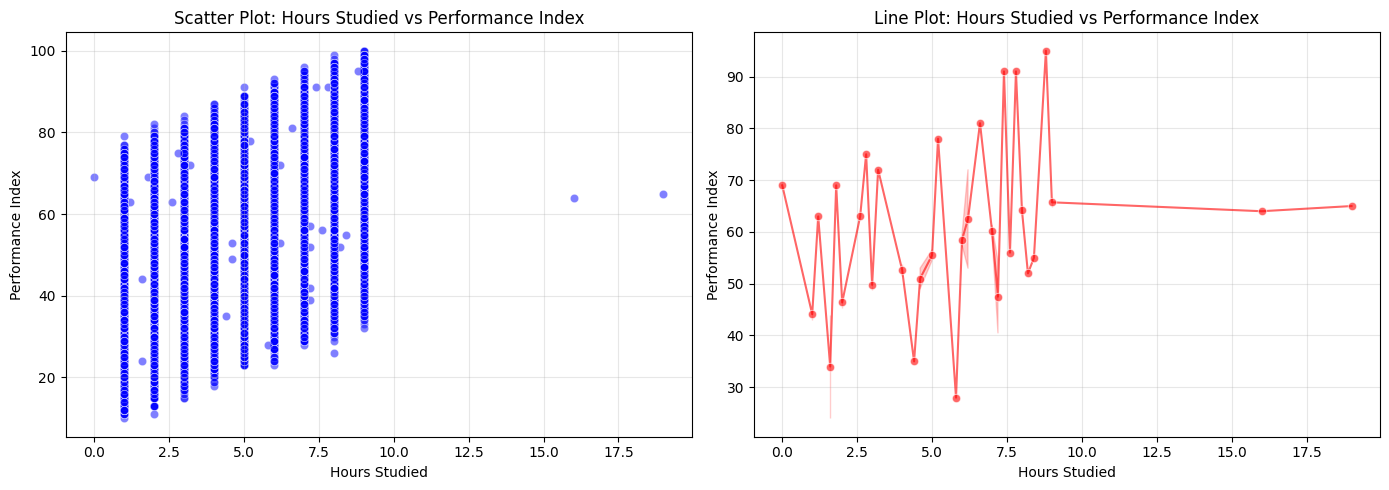

In [46]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Scatter plot using seaborn
sns.scatterplot(data=df, x='Hours Studied', y='Performance Index', ax=axes[0], alpha=0.5, color='blue')
axes[0].set_xlabel('Hours Studied')
axes[0].set_ylabel('Performance Index')
axes[0].set_title('Scatter Plot: Hours Studied vs Performance Index')
axes[0].grid(True, alpha=0.3)

# Line plot using seaborn
sorted_df = df.sort_values('Hours Studied')
sns.lineplot(data=sorted_df, x='Hours Studied', y='Performance Index', ax=axes[1], marker='o', color='red', alpha=0.6)
axes[1].set_xlabel('Hours Studied')
axes[1].set_ylabel('Performance Index')
axes[1].set_title('Line Plot: Hours Studied vs Performance Index')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

Quantile Table:
                                   Min    Q1  Median    Q3    Max
Hours Studied                      0.0   3.0     5.0   7.0   19.0
Previous Scores                   40.0  54.0    69.0  85.0   99.0
Sleep Hours                        4.0   5.0     7.0   8.0    9.0
Sample Question Papers Practiced   0.0   2.0     5.0   7.0  100.0
Performance Index                 10.0  40.0    55.0  71.0  100.0

Frequency Table:
                             Column  Count      Mean    Std Dev
0                     Hours Studied  10000   4.99424   2.595357
1                   Previous Scores  10000  69.44590  17.341147
2                       Sleep Hours  10000   6.53044   1.694429
3  Sample Question Papers Practiced  10000   4.60430   3.133350
4                 Performance Index  10000  55.22480  19.212558


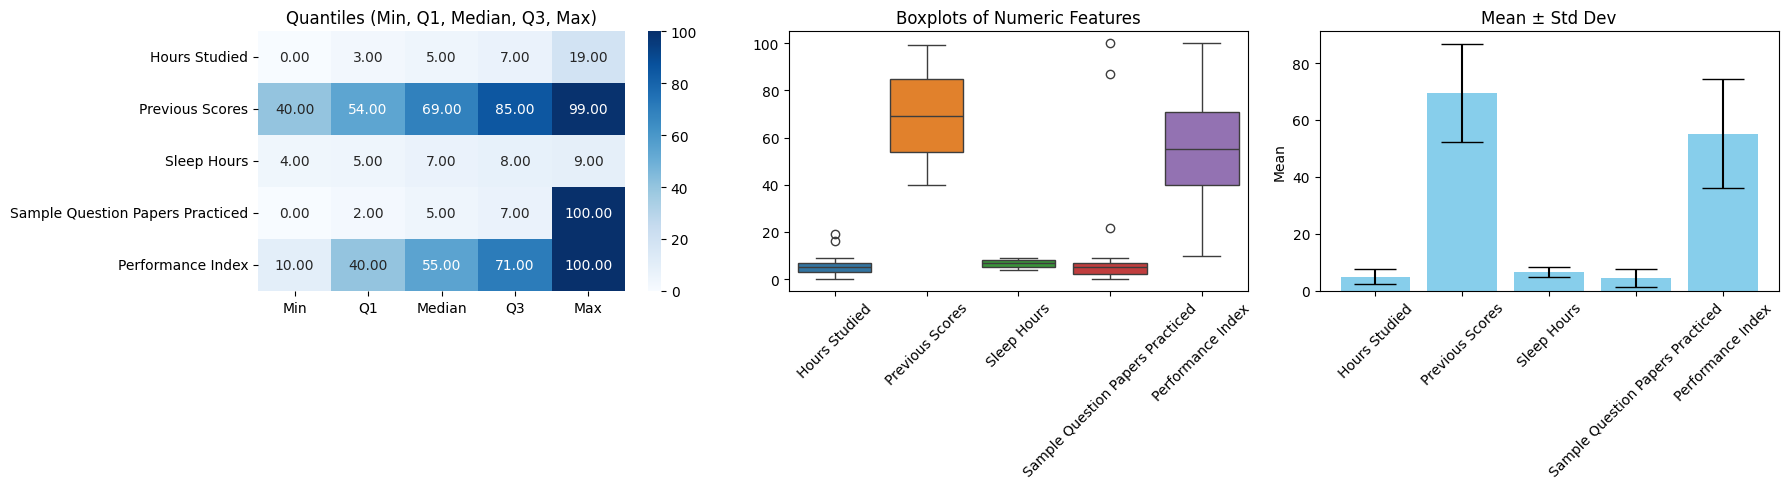

In [52]:
# Create a quantile and frequency table
quantile_table = df[numeric_cols].quantile([0, 0.25, 0.5, 0.75, 1.0]).T
quantile_table.columns = ['Min', 'Q1', 'Median', 'Q3', 'Max']

frequency_table = pd.DataFrame({
    'Column': numeric_cols,
    'Count': [df[col].count() for col in numeric_cols],
    'Mean': [df[col].mean() for col in numeric_cols],
    'Std Dev': [df[col].std() for col in numeric_cols]
})

print("Quantile Table:")
print(quantile_table)
print("\nFrequency Table:")
print(frequency_table)

# Visualize the values: quantiles heatmap, boxplots and mean±std bar chart
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# 1) Heatmap of quantiles
sns.heatmap(quantile_table, annot=True, fmt=".2f", cmap="Blues", ax=axes[0])
axes[0].set_title("Quantiles (Min, Q1, Median, Q3, Max)")

# 2) Boxplots for numeric features (shows median, IQR, whiskers)
sns.boxplot(data=df[numeric_cols], ax=axes[1])
axes[1].set_title("Boxplots of Numeric Features")
axes[1].tick_params(axis='x', rotation=45)

# 3) Bar plot of means with std dev as error bars
axes[2].bar(frequency_table['Column'], frequency_table['Mean'], yerr=frequency_table['Std Dev'],
            capsize=15, color='skyblue')
axes[2].set_title("Mean ± Std Dev")
axes[2].set_ylabel("Mean")
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()